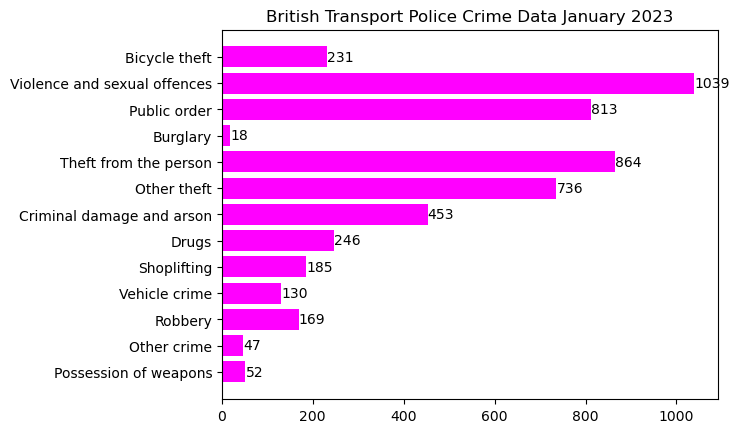

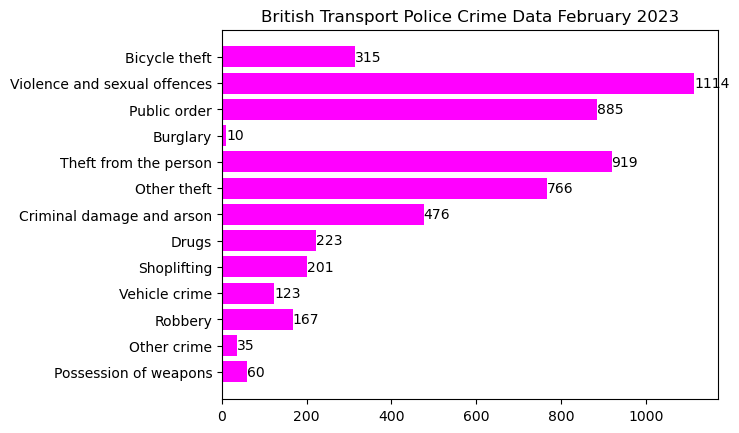

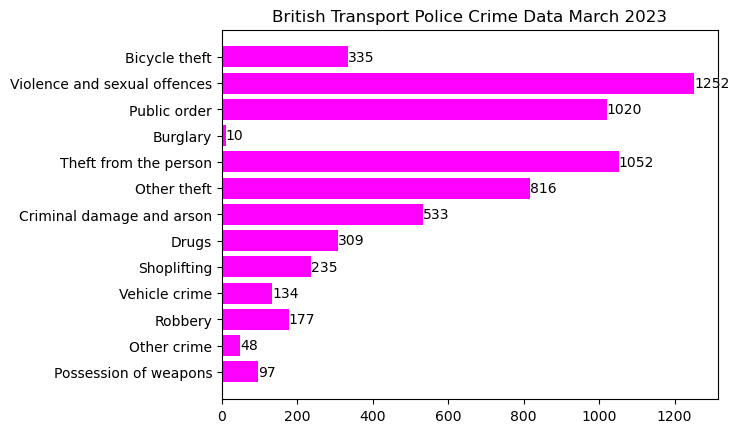

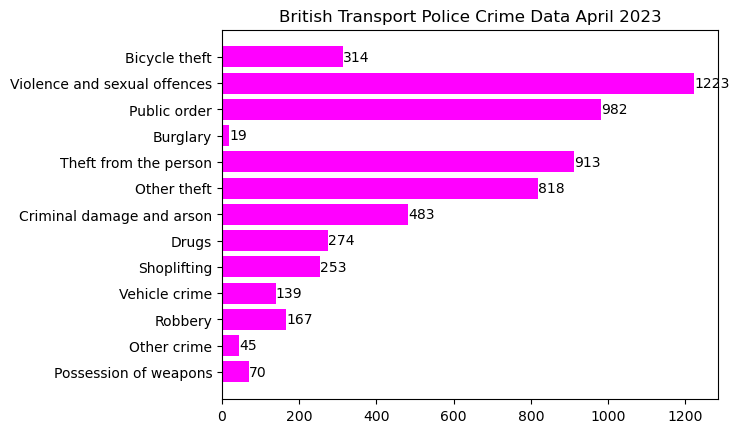

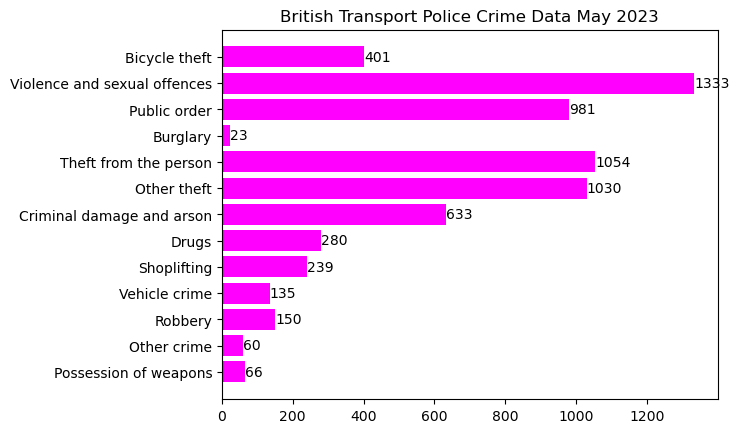

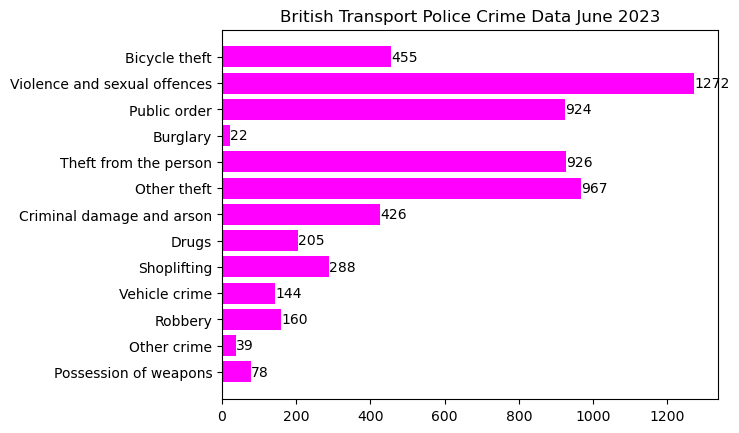

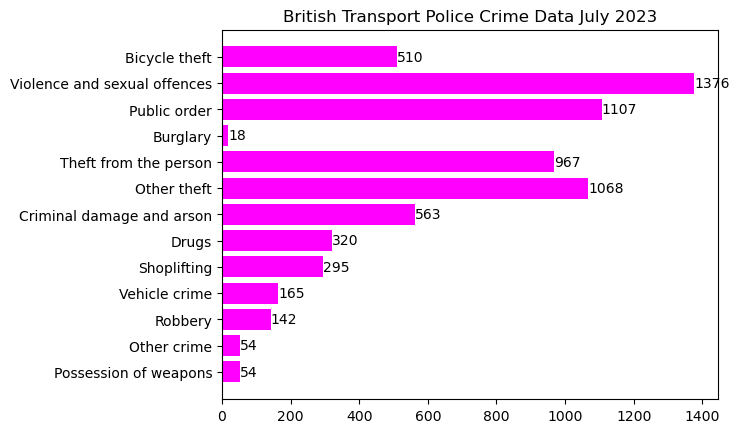

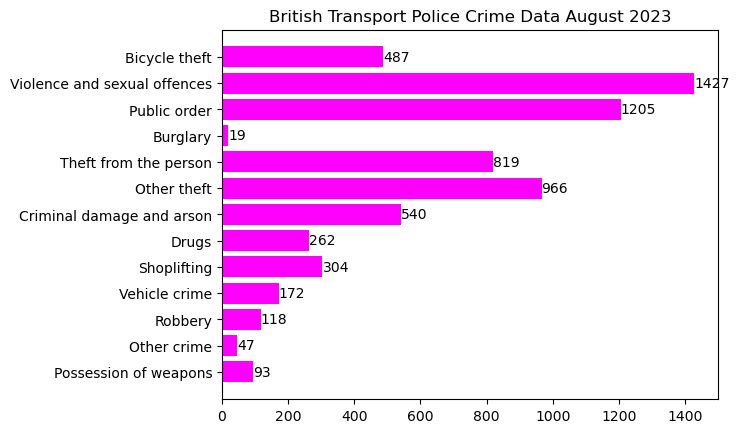

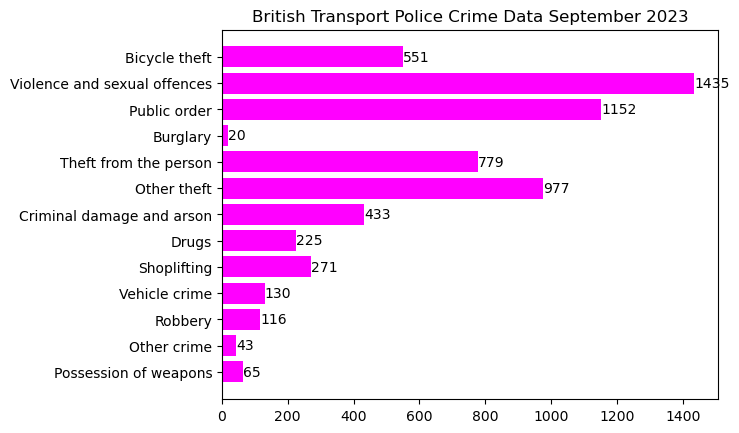

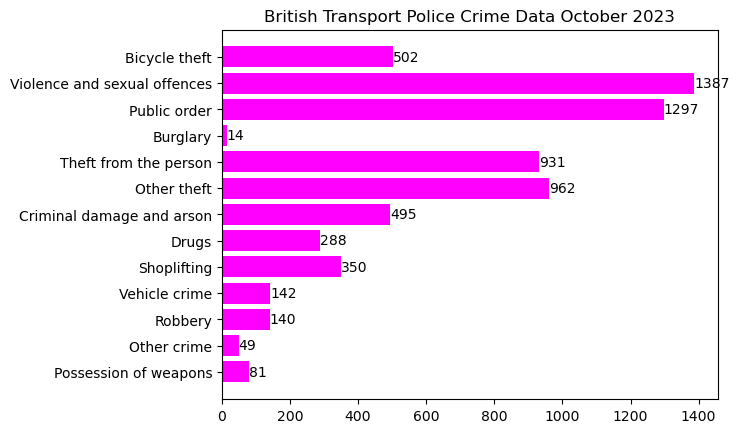

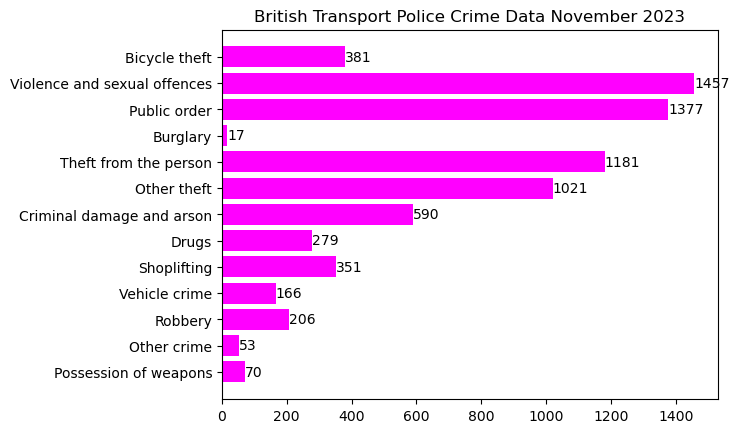

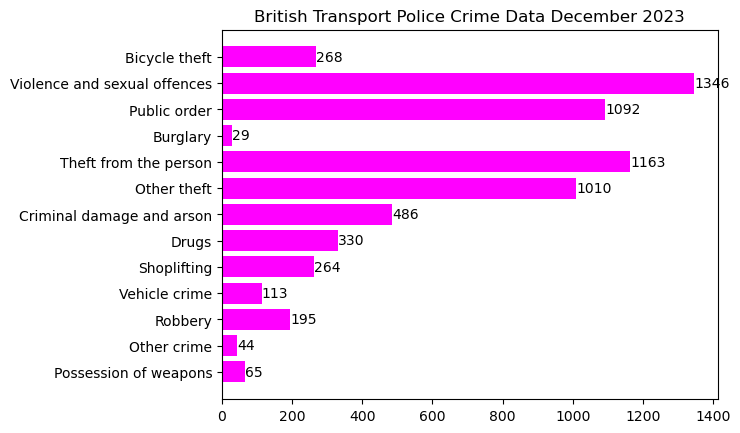

In [1]:
# Imports relevant modules
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Intialises the root file directory and stores files with the extension ".csv" in the root directory/sub directories in 
# the dir_list variable
path = "C:/Users/aslan/OneDrive - University of Surrey/Lab_ENG0020/Coursework/"
dir_list = glob.glob(os.path.join(path, "**/*.csv"), recursive=True)

# Iterates through the dir_list list (csv files) and reads the data in these files storing it in the crime_data variable
# and appending this data to the data_list list. Then it concatenates the data in data_list into the "frame" data frame.
data_list = []

for file_path in dir_list:
    crime_data = pd.read_csv(file_path)
    data_list.append(crime_data)

frame = pd.concat(data_list)

# Initialises arrays for the months and crime types
months = ["January 2023", "February 2023", "March 2023", "April 2023", "May 2023", "June 2023", "July 2023", "August 2023", "September 2023", "October 2023", "November 2023", "December 2023"]
crimes = ["Possession of weapons", "Other crime", "Robbery", "Vehicle crime", "Shoplifting", "Drugs", "Criminal damage and arson", "Other theft", "Theft from the person", "Burglary", "Public order", "Violence and sexual offences", "Bicycle theft"]
crimes_freq3 = []

# For each iteration of data_list (a month), the inside for loop iterates through the "crimes" list (crime types) and
# stores the frequency of that crime type for that month in the total_freq variable which is then appended to the 
# crimes_freq3 list. After this loop finishes iterating for all crime types the plot for that month is created by
# initialising the title of the plot, passing the crimes (crime types) list and crimes_freq3 list as parameters into the 
# bar chart initialisation and another for loop is used to iterate through the bars and add their values as text next to
# each bar. Then the outer for loop continues iterating to the next index (month) till it reaches the end of the data_list 
# (creating a plot of the crime frequencies for each month).

counter = 0
for i in data_list:
    crimes_freq3 = []
    for crime_type in crimes:
        total_freq = i[(i["Crime type"] == crime_type)]
        crimes_freq3.append(total_freq.shape[0])
    plt.title("British Transport Police Crime Data " + months[counter])
    bars = plt.barh(crimes, crimes_freq3, color = "magenta")
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', ha='left', va='center')
    plt.show()
    counter += 1
